# WeatherPy
Note
Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

# Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).

In [9]:
record_count = 1
set_count = 1
city_data = []
#Iterate over each row
for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
#index, row in df.iterrows():
    #city = row['city']
    print("Processing Record %s of set %s | %s" %(record_count, set_count, city))
    record_count += 1
    #city = city.replace(" ", "&")
    url = "http://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&q=" + city
    #print(url)
    try:
        weather = requests.get(url).json()
        city_temp = weather['main']['temp']
        lat = weather['coord']['lat']
        lon = weather['coord']['lon']
        city_name = weather['name']
        dates = weather['dt']
        city_max_temp = weather['main']['temp_max']
        humid = weather['main']['humidity']
        winds = weather['wind']['speed']
        clouds = weather['clouds']['all']
        
        #Append city into city_info
        city_data.append({"City": city,
                      "Temperature" : city_max_temp,
                      "Humidity" : humid,
                      "Lng" : lon,
                      "Lat" : lat,
                      "Cloudiness" : clouds,
                      "City" : city_name,
                      "Windspeed" : winds,
                      "Date" : dates
                      })
        
    
    except:
        print(f'Missing data in city number {set_count} of {len(cities)}. | Skipping {city}')
        set_count = set_count + 1
    
print('------------------------------')
print('End of Records')
print('------------------------------')


Processing Record 1 of set 1 | ponta do sol
Processing Record 2 of set 1 | ushuaia
Processing Record 3 of set 1 | plaisance-du-touch
Processing Record 4 of set 1 | hithadhoo
Processing Record 5 of set 1 | kapaa
Processing Record 6 of set 1 | fortuna
Processing Record 7 of set 1 | dingle
Processing Record 8 of set 1 | saint-augustin
Processing Record 9 of set 1 | guerrero negro
Processing Record 10 of set 1 | tamiahua
Processing Record 11 of set 1 | punta arenas
Processing Record 12 of set 1 | bluff
Processing Record 13 of set 1 | lebu
Processing Record 14 of set 1 | lavrentiya
Processing Record 15 of set 1 | kaitangata
Processing Record 16 of set 1 | vaitupu
Missing data in city number 1 of 641. | Skipping vaitupu
Processing Record 17 of set 2 | tezu
Processing Record 18 of set 2 | cardston
Processing Record 19 of set 2 | namatanai
Processing Record 20 of set 2 | ahipara
Processing Record 21 of set 2 | grand centre
Missing data in city number 2 of 641. | Skipping grand centre
Processin

Processing Record 26 of set 19 | ponferrada
Processing Record 27 of set 19 | marrakesh
Processing Record 28 of set 19 | kutum
Processing Record 29 of set 19 | wucheng
Processing Record 30 of set 19 | port keats
Processing Record 31 of set 19 | castro
Processing Record 32 of set 19 | hasaki
Processing Record 33 of set 19 | cockburn town
Processing Record 34 of set 19 | taolanaro
Missing data in city number 19 of 641. | Skipping taolanaro
Processing Record 35 of set 20 | mar del plata
Processing Record 36 of set 20 | merauke
Processing Record 37 of set 20 | nhulunbuy
Processing Record 38 of set 20 | promyshlennyy
Processing Record 39 of set 20 | inuvik
Processing Record 40 of set 20 | elk point
Processing Record 41 of set 20 | caravelas
Processing Record 42 of set 20 | segezha
Processing Record 43 of set 20 | magaria
Processing Record 44 of set 20 | tuatapere
Processing Record 45 of set 20 | linshu
Missing data in city number 20 of 641. | Skipping linshu
Processing Record 46 of set 21 | 

Processing Record 47 of set 39 | trenggalek
Processing Record 48 of set 39 | tallahassee
Processing Record 49 of set 39 | ksenyevka
Missing data in city number 39 of 641. | Skipping ksenyevka
Processing Record 0 of set 41 | cayenne
Processing Record 1 of set 41 | yarmouth
Processing Record 2 of set 41 | linchuan
Missing data in city number 41 of 641. | Skipping linchuan
Processing Record 3 of set 42 | cookeville
Processing Record 4 of set 42 | rio grande
Processing Record 5 of set 42 | saint george
Processing Record 6 of set 42 | bandarbeyla
Processing Record 7 of set 42 | kruisfontein
Processing Record 8 of set 42 | ngunguru
Processing Record 9 of set 42 | burica
Missing data in city number 42 of 641. | Skipping burica
Processing Record 10 of set 43 | spas-demensk
Processing Record 11 of set 43 | palabuhanratu
Missing data in city number 43 of 641. | Skipping palabuhanratu
Processing Record 12 of set 44 | praia da vitoria
Processing Record 13 of set 44 | camacha
Processing Record 14 o

Processing Record 25 of set 58 | fuengirola
Processing Record 26 of set 58 | aklavik
Processing Record 27 of set 58 | arnedo
Processing Record 28 of set 58 | mpongwe
Processing Record 29 of set 58 | mitu
Processing Record 30 of set 58 | oranjemund
Processing Record 31 of set 58 | biltine
Processing Record 32 of set 58 | port hardy
Processing Record 33 of set 58 | san joaquin
Processing Record 34 of set 58 | ulaanbaatar
Processing Record 35 of set 58 | jorpeland
Processing Record 36 of set 58 | saint anthony
Processing Record 37 of set 58 | san jeronimo
Processing Record 38 of set 58 | banjar
Processing Record 39 of set 58 | svetlyy
Processing Record 40 of set 58 | galgani
Missing data in city number 58 of 641. | Skipping galgani
Processing Record 41 of set 59 | ulcinj
Processing Record 42 of set 59 | rio gallegos
Processing Record 43 of set 59 | moerai
Processing Record 44 of set 59 | karabuk
Processing Record 45 of set 59 | warqla
Missing data in city number 59 of 641. | Skipping warq

# Convert Raw Data to DataFrame
Export the city data into a .csv

Display the DataFrame

In [10]:
# For Dataframe
city_data_pd = pd.DataFrame(city_data)
city_data_pd.head()


,City,Temperature,Humidity,Lng,Lat,Cloudiness,Windspeed,Date
0,Ponta do Sol,292.15,68,-17.10,32.67,20,5.10,1603770100
1,Ushuaia,281.15,42,-68.30,-54.80,20,6.20,1603770066
2,Plaisance-du-Touch,283.15,87,1.30,43.57,75,5.70,1603770618
3,Hithadhoo,301.78,66,73.08,-0.60,49,3.79,1603770097
4,Kapaa,296.15,88,-159.32,22.08,90,3.10,1603770099


In [11]:
#Extract relevant fields from DataFrame
lat = city_data_pd["Lat"]
city_max_temps = city_data_pd["Temperature"]
humid = city_data_pd["Humidity"]
clouds = city_data_pd["Cloudiness"]
winds = city_data_pd["Windspeed"]

In [12]:
#Export dataframe to CSV
city_data_pd.to_csv(output_data_file, encoding="utf-8", index=False)
city_data_pd.round()
city_data_pd.head()

,City,Temperature,Humidity,Lng,Lat,Cloudiness,Windspeed,Date
0,Ponta do Sol,292.15,68,-17.10,32.67,20,5.10,1603770100
1,Ushuaia,281.15,42,-68.30,-54.80,20,6.20,1603770066
2,Plaisance-du-Touch,283.15,87,1.30,43.57,75,5.70,1603770618
3,Hithadhoo,301.78,66,73.08,-0.60,49,3.79,1603770097
4,Kapaa,296.15,88,-159.32,22.08,90,3.10,1603770099


# Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [13]:
city_data_h = city_data_pd[city_data_pd['Humidity'] <=100]
city_data_h

,City,Temperature,Humidity,Lng,Lat,Cloudiness,Windspeed,Date
0,Ponta do Sol,292.15,68,-17.10,32.67,20,5.10,1603770100
1,Ushuaia,281.15,42,-68.30,-54.80,20,6.20,1603770066
2,Plaisance-du-Touch,283.15,87,1.30,43.57,75,5.70,1603770618
3,Hithadhoo,301.78,66,73.08,-0.60,49,3.79,1603770097
4,Kapaa,296.15,88,-159.32,22.08,90,3.10,1603770099
...,...,...,...,...,...,...,...,...
583,Tangermünde,280.93,81,11.98,52.54,100,0.89,1603770666
584,Tucumcari,266.15,79,-103.72,35.17,90,5.70,1603770666
585,Noumea,305.15,40,166.46,-22.28,20,4.10,1603770450
586,Quatre Cocos,298.15,69,57.76,-20.21,40,5.10,1603770130


In [11]:
#  Get the indices of cities that have humidity over 100%.
humidIndices = city_data_pd[city_data_pd['Humidity'] >100].index
humidIndices()

TypeError: 'Int64Index' object is not callable

# Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

Save the plotted figures as .pngs.


# Latitude vs. Temperature Plot

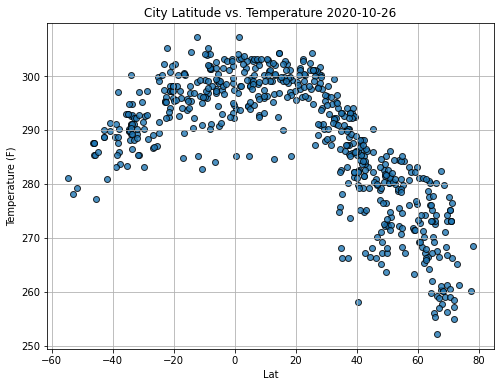

In [14]:
#Plot latitude vs temperature and save as .png
plt.figure(figsize=(8,6))
plt.scatter(city_data_pd['Lat'], city_data_pd['Temperature'], edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="cities")
plt.title(f'City Latitude vs. Temperature {date.today()}')
plt.xlabel('Lat')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')


# Latitude vs. Humidity Plot

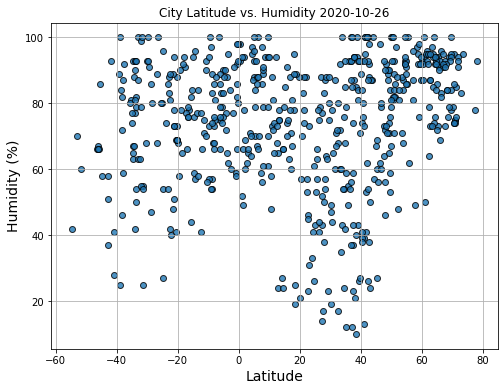

In [17]:
#Plot latitude vs humidity and save as .png
plt.figure(figsize=(8,6))
plt.scatter(city_data_pd['Lat'], city_data_pd['Humidity'], edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="cities")                             
plt.title(f'City Latitude vs. Humidity {date.today()}',fontsize='12')
plt.xlabel('Latitude', fontsize='14')
plt.ylabel('Humidity (%)', fontsize='14')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')

# Latitude vs. Cloudiness Plot

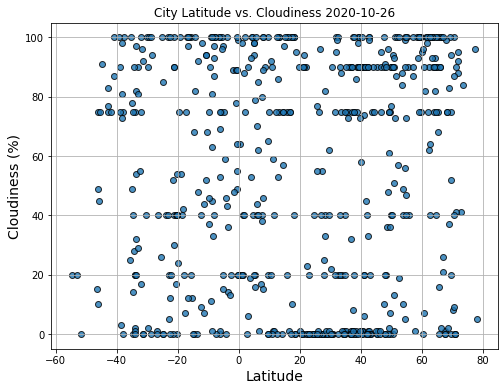

In [16]:
#Plot latitude vs cloudiness and save as .png
plt.figure(figsize=(8,6))
plt.scatter(city_data_pd['Lat'], city_data_pd['Cloudiness'], edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="cities")
plt.title(f'City Latitude vs. Cloudiness {date.today()}',fontsize='12')
plt.xlabel('Latitude',fontsize='14')
plt.ylabel('Cloudiness (%)',fontsize='14')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')


# Latitude vs. Wind Speed Plot

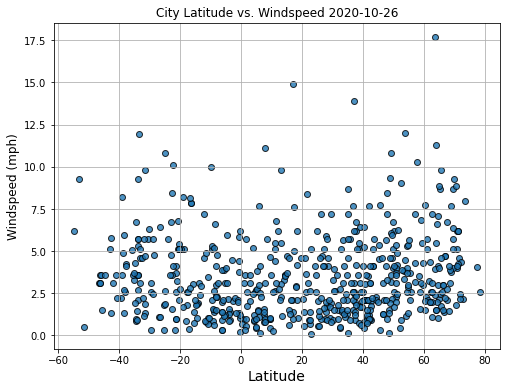

In [18]:
#Plot latitude vs wind speed and save as .png
plt.figure(figsize=(8,6))
plt.scatter(city_data_pd['Lat'], city_data_pd['Windspeed'], edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="cities")
plt.title(f'City Latitude vs. Windspeed {date.today()}',fontsize='12')
plt.xlabel('Latitude',fontsize='14')
plt.ylabel('Windspeed (mph)',fontsize='12')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')

# Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
mask = city_data_pd['Lat'] > 0
northern_hemisphere = city_data_pd[mask]
southern_hemisphere = city_data_pd[~mask]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

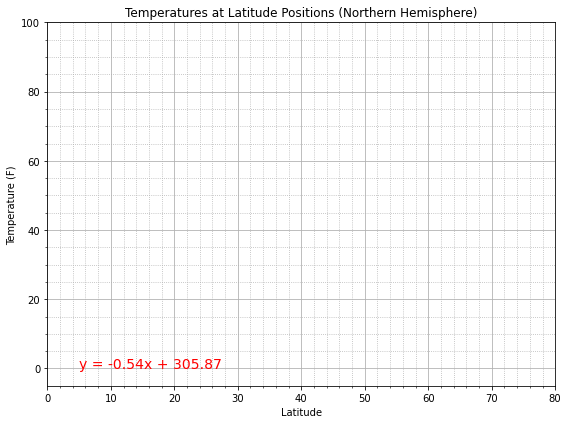

r-value is -0.8573


<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#correlation = st.pearsonr(x_values, y_values)

plt.figure(figsize=(8,6))
plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-5, 100)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_temp2.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

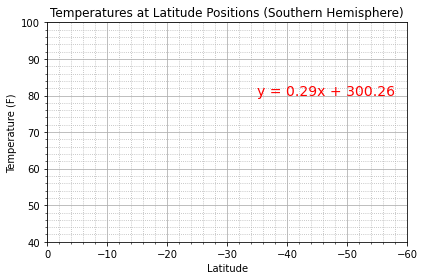

r-value is 0.663


<Figure size 432x288 with 0 Axes>

In [21]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_temp3.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

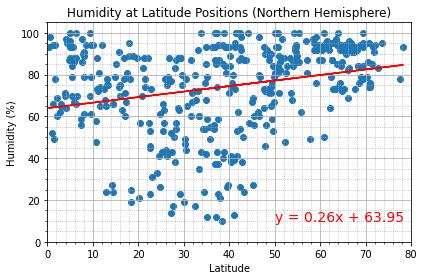

r-value is 0.2515


<Figure size 432x288 with 0 Axes>

In [22]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_humdity2.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")


# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 


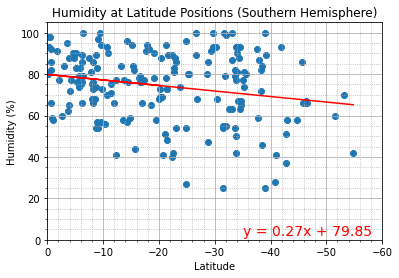

r-value is 0.2149


<Figure size 432x288 with 0 Axes>

In [23]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
print ('The r-value is: ')
plt.annotate(line_eq,(-35,2),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()
plt.savefig('lat_humdity3.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")


# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

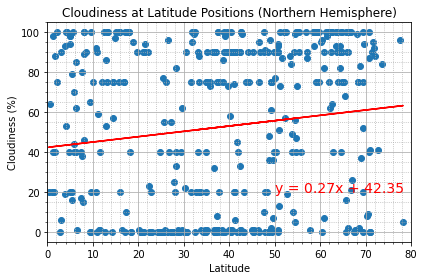

r-value is 0.1363


<Figure size 432x288 with 0 Axes>

In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_clouds2.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

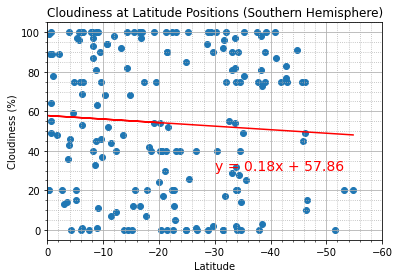

r-value is 0.0671


<Figure size 432x288 with 0 Axes>

In [25]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 105)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()
plt.savefig('lat_clouds3.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

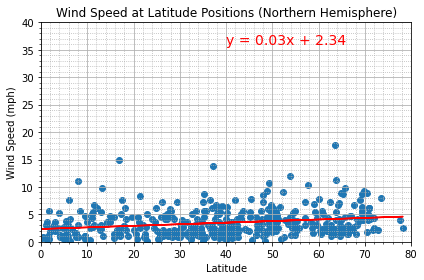

r-value is 0.2348


<Figure size 432x288 with 0 Axes>

In [26]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,36),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(0, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig('lat_wind2.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")


# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

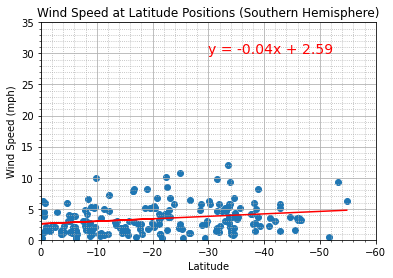

r-value is -0.2296


<Figure size 432x288 with 0 Axes>

In [27]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Windspeed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 35)
plt.xlim(0, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()
plt.savefig('lat_wind3.png', bbox_inches='tight')

print(f"r-value is {round(rvalue,4)}")